In [16]:
import torch
import os
from dataloader import FullSizeImageDataset, PatchesDataLoader
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import cv2

In [17]:
# Setting device to GPU
device = torch.device("cuda")

In [18]:
## Reference: https://stackoverflow.com/questions/4813061/non-alphanumeric-list-order-from-os-listdir
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [19]:
def combine_patches(patches_dir):
    big_img = torch.zeros((9 * 512, 8 * 512))
    col_index = 0
    row_index = 0
    row_counter = 1
    col_counter = 1
    for image in sorted_alphanumeric(os.listdir(patches_dir)):
        image = torch.load(os.path.join(patches_dir, image))
        big_img[row_index:row_index + 512, col_index:col_index + 512] = image.squeeze(0).squeeze(0)
        if col_counter % 8 == 0:
            row_counter += 1
            row_index += 512
            col_counter = 1
            col_index = 0
        else:
            col_counter += 1
            col_index += 512

    return big_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


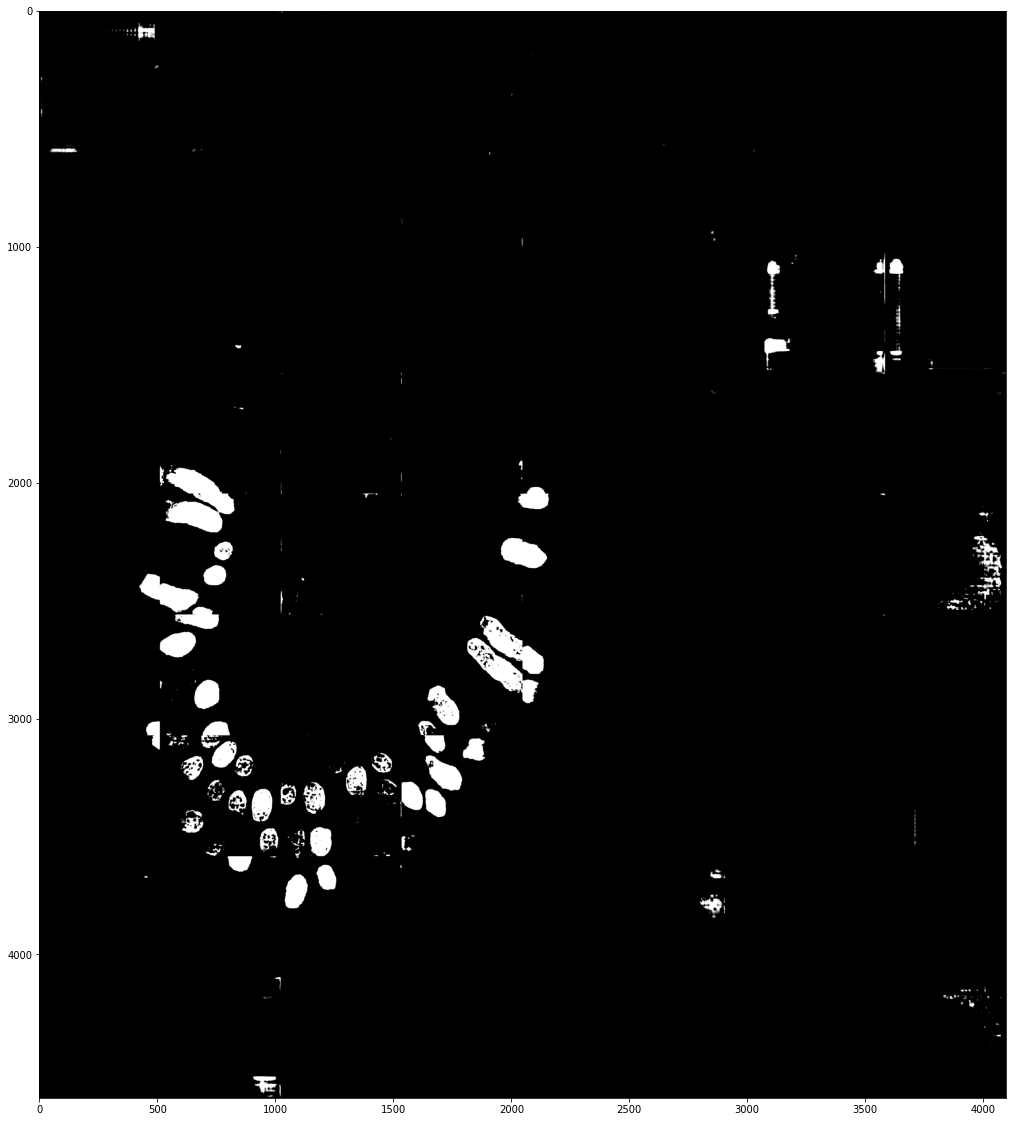

In [20]:
full_img = combine_patches("patches")
plt.figure(figsize=(20, 20))
plt.imshow(torch.cat([full_img.unsqueeze(0), full_img.unsqueeze(0), full_img.unsqueeze(0)], dim=0).permute(1, 2, 0).detach().cpu().numpy())